In [ ]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import pipeline  ,ensemble 
from sklearn.pipeline import Pipeline 
from sklearn import impute
from sklearn import compose
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix,roc_auc_score
from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer,PowerTransformer,QuantileTransformer, RobustScaler,StandardScaler,LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.tree          import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression    
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram') # Useful for display the pipeline
print("Pandas  ", pd.__version__)
print("Sklearn ", sklearn.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [ ]:
df = pd.read_csv('heart.csv')
df_train=df.iloc[:250,:]
df_test=df.iloc[250:,:].drop('target',axis=1)


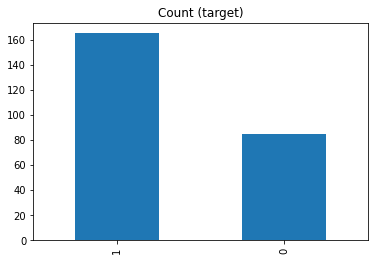

In [ ]:
df_train['target'].value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
print(f"Train data Describe \n{df_train.describe()}\n")

Train data Describe 
              age         sex          cp    trestbps        chol         fbs  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    54.080000    0.660000    1.072000  131.392000  247.524000    0.140000   
std      9.381773    0.474659    1.015352   17.399116   52.623096    0.347683   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.250000    0.000000   
50%     54.500000    1.000000    1.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

         restecg     thalach       exang     oldpeak       slope          ca  \
count  250.00000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.50400  152.472000    0.276000    0.944800    1.436000    0.628000   
std      

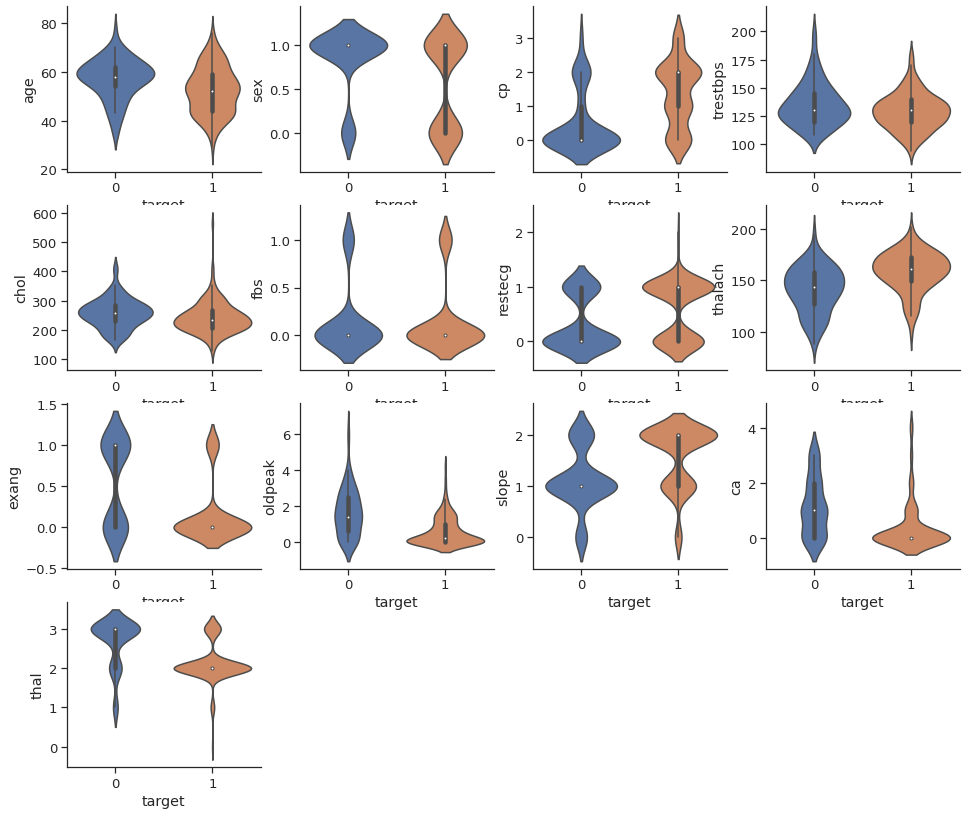

In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(4, 4, i+1)
    sns.violinplot(x="target",y=feature,data=df_train)
    
sns.despine()

In [ ]:
df_train['chol*age']=df_train['chol']*df_train['age']
df_train['trestbps*cp']=df_train['trestbps']*df_train['cp']
df_train['trestbps*age']=df_train['trestbps']*df_train['age']

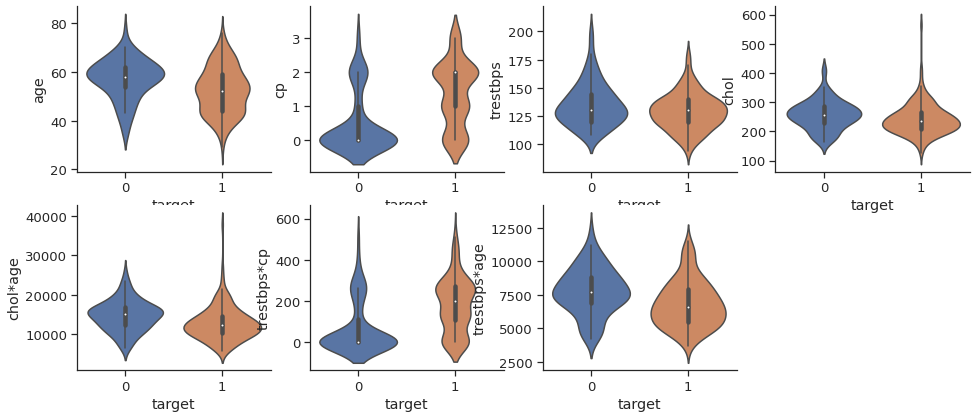

In [ ]:
columns = ['age', 'cp', 'trestbps', 'chol', 'chol*age','trestbps*cp','trestbps*age']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(4, 4, i+1)
    sns.violinplot(x="target",y=feature,data=df_train)
    
sns.despine()

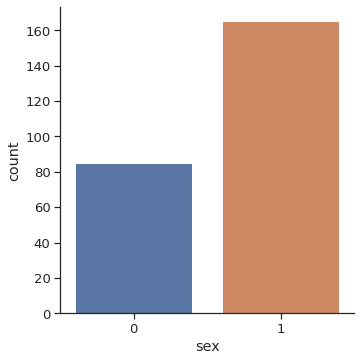

In [ ]:
sns.catplot(x='sex', kind='count', data=df_train)
plt.show()
plt.close()

<AxesSubplot:>

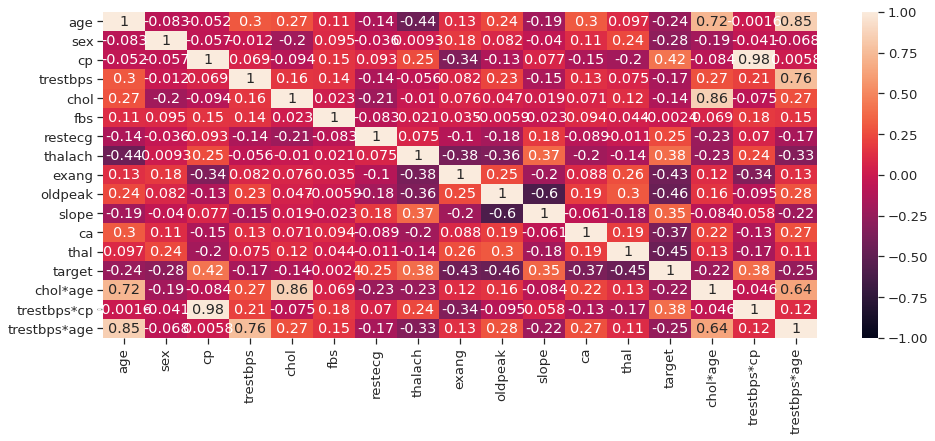

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap

In [ ]:
num_vars=['age',  'trestbps', 'chol', 'thalach','oldpeak', 'chol*age', 'trestbps*cp', 'trestbps*age']
cat_vars=[ 'sex', 'cp', 'fbs', 'restecg','exang',  'slope', 'ca', 'thal' ]

In [ ]:
from sklearn.preprocessing import scale
print(df.info())
# Centering and Scaling Model Features
    # Separating Features and Labels
data_features = df.drop('target', axis=1)
data_labels = df.target
    # Scaling Features
data_features_scaled = scale(data_features)

# Features/Label in numpy arrays
features = data_features_scaled
label = data_labels.to_numpy()
# Model/Hold-out sets
model_features, holdout_features, model_label, holdout_label = \
    train_test_split(features, label, test_size=0.2, random_state=57, stratify=label)
# Test/Train sets from Model set
train_features, test_features, train_label, test_label = \
    train_test_split(model_features, model_label, test_size=0.2, random_state=14, stratify=model_label)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


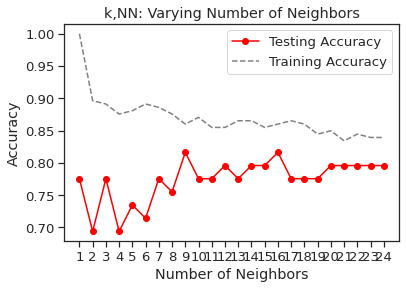

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
neighbors = np.arange(1, 25, step=1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Iterating Hyperparamater Candidates and Recording Performance
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_label)
    train_accuracy[i] = knn.score(train_features, train_label)
    test_accuracy[i] = knn.score(test_features, test_label)
# Visualize Performance of Hyperparamaters
plt.title('k,NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='red', marker='o')
plt.plot(neighbors, train_accuracy, label='Training Accuracy', linestyle='--', color='grey')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.close

In [ ]:
from sklearn.metrics import classification_report
# Fitting and Scoring the model
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(model_features, model_label)
knn_model_score = knn.score(model_features, model_label)
knn_holdout_score = knn.score(holdout_features, holdout_label)
knn_holdout_predict = knn.predict(holdout_features)
print('INITIAL MODEL PERFORMANCE')
print('kNN Score on Training Data: {}%'.format((knn_model_score*100).round(2)))
print('kNN Score on Hold-Out Data: {}%'.format((knn_holdout_score*100).round(2)))
print('kNN Classification Report:')
print(classification_report(holdout_label, knn_holdout_predict))
print('')

INITIAL MODEL PERFORMANCE
kNN Score on Training Data: 82.64%
kNN Score on Hold-Out Data: 88.52%
kNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Tuning for optimal hyperparameter 'k' (number of neighbors) with GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 100, step=1)}
knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid, cv=2)
knn_grid_cv.fit(model_features, model_label)
optimal_k = knn_grid_cv.best_params_['n_neighbors']
optimal_score = knn_grid_cv.best_score_
# Testing the model on unseen data
knn_tuned = KNeighborsClassifier(n_neighbors=optimal_k)
knn_tuned.fit(model_features, model_label)
accuracy = knn_tuned.score(holdout_features, holdout_label)
knn_tuned_predict = knn_tuned.predict(holdout_features)
print('TUNING PERFORMANCE')
print('Optimal Value of Hyperparameter: {}'.format(optimal_k))
print('kNN Score on Training Data: {}%'.format((optimal_score * 100).round(2)))
print('kNN Score on Hold-Out Data: {}%'.format((accuracy * 100).round(2)))
print('kNN Classifciation Report:')
print(classification_report(holdout_label, knn_tuned_predict))

TUNING PERFORMANCE
Optimal Value of Hyperparameter: 14
kNN Score on Training Data: 82.64%
kNN Score on Hold-Out Data: 85.25%
kNN Classifciation Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Pipeline  for preprocess

In [ ]:
num_4_Models = pipeline.Pipeline(steps=[
    ('scalar',PowerTransformer()),
    ('Normalizer',Normalizer())
])
cat_4_Models = pipeline.Pipeline(steps=[
  ('onehot', OneHotEncoder( handle_unknown='ignore'))
])

preprocessor = compose.ColumnTransformer(transformers=[
    ('num', num_4_Models, num_vars),
    ('cat', cat_4_Models, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar', PowerTransformer()),
                                                 ('Normalizer', Normalizer())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'chol*age', 'trestbps*cp',
                                  'trestbps*age']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

# Models

In [ ]:
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

NameError: name 'X_train' is not defined

In [ ]:
classifier_models = {
"DecisionTreeClassifier": DecisionTreeClassifier(),
'KNeighborsClassifier':KNeighborsClassifier(),
'LogisticRegression':LogisticRegression(),
"RandomForestClassifier":ensemble.RandomForestClassifier(),
"AdaBoostClassifier":ensemble.AdaBoostClassifier(),
"GradientBoostingClassifier":ensemble.GradientBoostingClassifier(),
"XGBClassifier":XGBClassifier(),
"LGBMClassifier":LGBMClassifier(),
"CatBoostClassifier":CatBoostClassifier(),
}
# make pipline with  preprocessing 
classifier_models = {name: pipeline.make_pipeline(preprocessor, model) for name, model in classifier_models.items()}
classifier_models["GradientBoostingClassifier"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   PowerTransformer()),
                                                                  ('Normalizer',
                                                                   Normalizer())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'chol*age', 'trestbps*cp',
                                                   'trestbps*age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:

x=df_train.drop('target',axis=1)
y=df_train['target']
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size=0.2,stratify = y,random_state=10 )
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [],'Time': []})
for model_name, model in classifier_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
    valid_pred = model.predict(x_val)
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_val, valid_pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_val, valid_pred)*100,
                    
                              "Time":     total_time},
                              ignore_index=True)
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

1:	learn: 0.6850520	total: 60.3ms	remaining: 30.1s
2:	learn: 0.6802955	total: 67.4ms	remaining: 22.4s
3:	learn: 0.6759886	total: 71.7ms	remaining: 17.9s
4:	learn: 0.6721302	total: 75.9ms	remaining: 15.1s
5:	learn: 0.6688504	total: 83.4ms	remaining: 13.8s
6:	learn: 0.6649154	total: 87.3ms	remaining: 12.4s
7:	learn: 0.6609627	total: 93.4ms	remaining: 11.6s
8:	learn: 0.6564128	total: 96.9ms	remaining: 10.7s
9:	learn: 0.6535639	total: 98ms	remaining: 9.7s
10:	learn: 0.6496695	total: 100ms	remaining: 9.01s
11:	learn: 0.6447590	total: 103ms	remaining: 8.51s
12:	learn: 0.6402398	total: 106ms	remaining: 8.03s
13:	learn: 0.6355929	total: 108ms	remaining: 7.6s
14:	learn: 0.6310126	total: 111ms	remaining: 7.32s
15:	learn: 0.6268372	total: 114ms	remaining: 7s
16:	learn: 0.6226509	total: 116ms	remaining: 6.71s
17:	learn: 0.6189357	total: 120ms	remaining: 6.52s
18:	learn: 0.6156504	total: 122ms	remaining: 6.29s
19:	learn: 0.6123051	total: 124ms	remaining: 6.07s
20:	learn: 0.6080823	total: 127ms	rema

,Model,Accuracy,Bal Acc.,Time
1,KNeighborsClassifier,92.000000,92.513369,0.070820
2,GradientBoostingClassifier,92.000000,91.087344,0.255282
3,RandomForestClassifier,90.000000,88.146168,0.330698
4,CatBoostClassifier,90.000000,88.146168,6.493486
5,XGBClassifier,88.000000,88.057041,3.284616
6,LogisticRegression,86.000000,86.541889,0.123781
7,AdaBoostClassifier,86.000000,85.115865,0.217952
8,LGBMClassifier,86.000000,85.115865,1.003535
9,DecisionTreeClassifier,78.000000,76.203209,0.070544


In [ ]:
#with the best  paramaters
classifier=ensemble.RandomForestClassifier()
tuning_model=Pipeline(steps=[('preprocessor', preprocessor),('classifier',classifier )])
tuning_model.fit(x_train,y_train)
print("model score: %.3f" % tuning_model.score(x_val, y_val))

model score: 0.900


In [5]:
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
import chime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl
import sklearn
from sklearn import pipeline      
from sklearn import preprocessing 
from sklearn import model_selection 
from sklearn import metrics         
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scal = MinMaxScaler()

#Load the saved model
model=pkl.load(open("final_model.p","rb"))


st.set_page_config(page_title="Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")


def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    
       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Ramon y Cajal Strive team ')
      
# following lines create boxes in which user can enter data required to make prediction
age = st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)

audio_file = open('alarm.mp3', 'rb').read()


if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    chime.warning()
    st.audio(audio_file, format='audio/mp3')

  else:
    st.success('You have lower risk of getting a heart attack!')
    chime.success()
    st.audio(audio_file, format='audio/mp3')


st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")

FileNotFoundError: [Errno 2] No such file or directory: 'final_model.p'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd775439-f3d2-4e6d-9916-a56701a1b233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>